# Objective
The purpose of this project is to build and train a logistic regression classifier that predicts the probabilty of a person having Coronary Heart Disease (CHD) given other features. Learning rate (alpha) can be adjusted. Two
different modes of gradient descent can be used: Batch and Mini-batch. The effects of learning rate and the two modes of gradient descent algorithm will be visualized with log loss vs. number of epochs plots. Finally, the
model coefficents will be compared with the coefficeints calculated by SciKit learn library to check for correctness.

#Dataset
Heart-disease data from Western Cape, South Africa (taken from a larger sample as described in Rousseauw et al,1983, South African Medical Journal) with the following 9 features and 1 target:<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**sbp**: systolic blood pressure<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**tobacco**: cumulative tobacco usage(kg)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ldl**: low density lipo-protein cholesterol<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**adiposity**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**famhist**: family history of heart disease <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**typea**: Type-A personality trait <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**obesity**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**alcohol**: Alcohol consumption (current)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**age**: current age at the onset of heart-disease<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**chd**: coronary heart disease(label/target)

Table of contents

1.   [Data Loading](#data_loading)
2.   [EDA](#eda)
3.   [One-Hot Encoding](#one_hot_encoding)
4.   [Standardization](#standardization)
5.   [Hypothesis (Model using sigmoid function)](#hypothesis)
6.   [Cost Function](#cost_function)
7.   [Batch Gradient Descent Iteration](#batch_gradient_descent_iteration)
8.   [Initialization of theta coefficients](#initialization_of_theta_coefficeints)
9.   [Learning Curves for Batch Gradient Descent](#learning_curves_for_batch_gradient_descent)
10.  [Mini-Batch gradient descent Iteration](#mini-batch_gradient_descent_iteration)
11. [Learning Curves for Mini-Batch Gradient Descent](#learning_curves_for_mini-batch_gradient_descent)
12. [Comparison with Sci-Kit Learn module](#comparison_with_sci_kit_learn)

In [ ]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

<a name="data_loading"></a>
# Data Loading

In [ ]:
data_url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"

In [ ]:
data = pd.read_csv(data_url)

In [ ]:
# Dropping un-necessary columns
data = data.drop(columns =['row.names'])

In [ ]:
data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


<a name="eda"></a>
# EDA

## Basic summmary statistics

In [ ]:
data.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [ ]:
data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

## Checking and visualizing the percentage distribution of people with corronary heart disease (CHD)

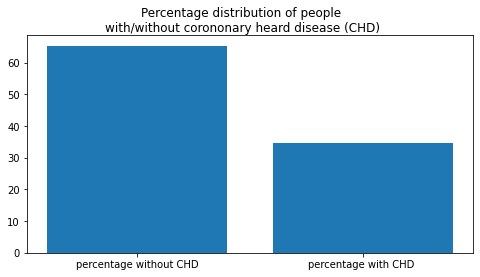

In [ ]:
names = ['percentage without CHD', 'percentage with CHD ']
values = [ (data.chd.value_counts()[0]/len(data.chd))*100, (data.chd.value_counts()[1]/len(data.chd))*100]

plt.figure(figsize=(8, 4))

plt.bar(names, values)

plt.suptitle('Percentage distribution of people \nwith/without corononary heard disease (CHD)')
plt.show()

##  Now lets see how many missing values we have

In [ ]:
# Let's check if we have any missing entries in our dataset

In [ ]:
data.isna().sum().sum()

0

The above confirms that we do not have any missing values for any columns

## Finding Categorical variables

In [ ]:
data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


We have one categorical variable, that is "famhist" because it's value can either be 'Present' or 'Absent', instead of numeric values

##  What features have the max correlation?

In [ ]:
features = ['sbp',	'tobacco'	,'ldl',	'adiposity',	'famhist'	,'typea'	,'obesity',	'alcohol',	'age'	]

In [ ]:
data[features].corr()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000


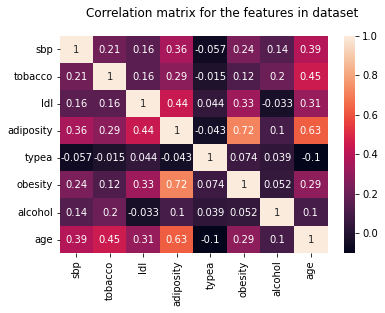

In [ ]:
sn.heatmap(data[features].corr(), annot=True)
plt.suptitle('Correlation matrix for the features in dataset\n\n')
plt.show()

From the plot above wee that "adiposity" and "obesity" variables are the most correlated

<a name="one_hot_encoding"></a>
# One-Hot Encoding

In [ ]:
data = pd.concat([data.drop(columns= ['famhist']), pd.get_dummies(data.famhist, drop_first = True).rename(columns ={'Present': 'FamHist'})], axis =1)

In [ ]:
data

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,FamHist
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58,0,0
458,182,4.20,4.41,32.10,52,28.61,18.72,52,1,0
459,108,3.00,1.59,15.23,40,20.09,26.64,55,0,0
460,118,5.40,11.61,30.79,64,27.35,23.97,40,0,0


<a name="standardization"></a>
# Standardization

In [ ]:
def standardize(arr):
  """Standardizes an input 1 D numpy array of floats"""
  # arr: numpy float array
  N = len(arr)
  mean = (arr.sum())/N
  tmp = (arr-mean)**2
  var = (tmp.sum())/N
  sd = math.sqrt(var)
  return (arr - mean)/sd

In [ ]:
numerical_feats = ["sbp", 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity' , 'alcohol', 'age']

In [ ]:
data[numerical_feats] = data[numerical_feats].apply(standardize)

In [ ]:
data

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,FamHist
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,1,1
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,1,0
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,0,1
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,1,1
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,1,1
...,...,...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488,0,0
458,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336,1,0
459,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912,0,0
460,-0.992806,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969,0,0


In [ ]:
data.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,FamHist
count,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,4.620000e+02,462.000000,462.000000
mean,-1.384174e-16,-2.210834e-17,3.421986e-16,1.807116e-16,-9.227828e-17,5.978863e-16,2.153160e-16,-9.612321e-18,0.346320,0.415584
std,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,1.001084e+00,0.476313,0.493357
min,-1.823123e+00,-7.924170e-01,-1.817753e+00,-2.401708e+00,-4.089354e+00,-2.695129e+00,-6.969825e-01,-1.906103e+00,0.000000,0.000000
25%,-6.997535e-01,-7.809742e-01,-7.047170e-01,-7.245926e-01,-6.224081e-01,-7.267824e-01,-6.761275e-01,-8.096968e-01,0.000000,0.000000
50%,-2.113321e-01,-3.565020e-01,-1.935182e-01,9.112757e-02,-1.059418e-02,-5.680824e-02,-3.898822e-01,1.496582e-01,0.000000,0.000000
75%,4.724579e-01,4.063492e-01,5.074164e-01,7.489145e-01,7.031887e-01,5.828745e-01,2.800340e-01,8.349118e-01,1.000000,1.000000
max,3.891408e+00,6.007857e+00,5.119082e+00,2.197976e+00,2.538631e+00,4.878906e+00,5.321938e+00,1.451640e+00,1.000000,1.000000


In [ ]:
# Let's create a seperate dataframe for all the features, excluding the target
data_feats = data.drop (columns = ['chd'])
data_feats

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,FamHist
0,1.058564,1.823073,0.478412,-0.295503,-0.418470,-0.176786,3.277738,0.629336,1
1,0.277089,-0.790237,-0.159680,0.412140,0.193344,0.671373,-0.612745,1.383115,0
2,-0.992806,-0.774980,-0.609245,0.884332,-0.112563,0.735519,-0.541183,0.218184,1
3,1.546985,0.842264,0.807126,1.624141,-0.214532,1.412621,0.295062,1.040488,1
4,-0.211332,2.171805,-0.599577,0.305351,0.703189,-0.012856,1.647775,0.423760,1
...,...,...,...,...,...,...,...,...,...
457,3.696039,-0.705234,0.599263,0.812281,1.111065,0.571590,-0.696983,1.040488,0
458,2.133091,0.123004,-0.159680,0.861173,-0.112563,0.609602,0.068519,0.629336,0
459,-1.481228,-0.138545,-1.522877,-1.309364,-1.336191,-1.414575,0.392385,0.834912,0
460,-0.992806,0.384553,3.320823,0.692625,1.111065,0.310252,0.283203,-0.192969,0


<a name="hypothesis"></a>
# Hypothesis (model) using Sigmoid function

In [ ]:
def calculate_sigmoid(theta_arr, feat_arr):
  # theta_arr : 1 x N arr where N is the total num of feats (including the bias)
  # feat_arr : 1 x N arr where N is the total num of feats (including the bias)

  # returns a double
  temp = np.multiply(theta_arr, feat_arr)
  temp = np.sum(temp)
  temp = temp * -1
  return 1/(1+math.exp(temp))

<a name="cost_function"></a>
# Cost Function

In [ ]:
# But first convert the feature pandas dataframe into numpy array which includes the bias feature that is 1.
data_feat_matrix = np.hstack((np.ones((data_feats.shape[0], 1)), data_feats))

In [ ]:
data_feat_matrix

array([[ 1.        ,  1.05856354,  1.82307289, ...,  3.27773797,
         0.62933573,  1.        ],
       [ 1.        ,  0.27708929, -0.79023744, ..., -0.61274463,
         1.3831147 ,  0.        ],
       [ 1.        , -0.99280637, -0.77498042, ..., -0.5411833 ,
         0.21818356,  1.        ],
       ...,
       [ 1.        , -1.48122778, -0.13854454, ...,  0.39238531,
         0.83491181,  0.        ],
       [ 1.        , -0.99280637,  0.38455344, ...,  0.28320317,
        -0.1929686 ,  0.        ],
       [ 1.        , -0.3090164 , -0.79241702, ..., -0.69698253,
         0.21818356,  1.        ]])

In [ ]:
# Also need to convert the the target 'chd' pandas dataframe column into a column vector
data_target_vector = data['chd'].to_numpy()
data_target_vector = data_target_vector.reshape((data_target_vector.shape[0], 1))

In [ ]:
def calculate_cost(theta_arr, feat_matrix, target_vector):
  # theta_arr : a numpy 1xN array of the coefficients where N is the total number of features (including the bias)
  # feat matrix : feature matrix containing the feature vals from the entire training dataset. This also includes the bias feature
  # target_vector: the column vector of the target values from each sample. its size is N x 1

  # Return value: A single double

  # First calculate the h_theta(x)
  h_theta_arr = np.zeros((feat_matrix.shape[0], 1))
  i = 0
  while (i < feat_matrix.shape[0]):
    h_theta_arr[i] = calculate_sigmoid(theta_arr, feat_matrix[i])
    i += 1
  # To facillitate easy multiplications
  temp_target = target_vector.reshape(target_vector.shape[0])
  h_theta_arr = h_theta_arr.reshape((h_theta_arr.shape[0]))

  temp_arr_1 = np.multiply(temp_target, np.log(h_theta_arr))
  tenp_arr_2 = np.multiply(1-temp_target, np.log(1-h_theta_arr))
  sum = temp_arr_1.sum() + tenp_arr_2.sum()

  sum = sum * (-1/(feat_matrix.shape[0]))
  return sum


<a name="batch_gradient_descent_iteration"></a>
# Batch Gradient Descent Iteration

In [ ]:
# Now define the function to update the thetas
def update_thetas(old_theta_arr, feat_matrix, target_vector, alpha):
  # old_theta_arr : a numpy 1xN array of the coefficients where N is the total number of features (including the bias)
  # feat matrix : feature matrix containing the feature vals from the entire training dataset. This also includes the bias feature
  # target_vector: the column vector of the target values from each sample. its size is N x 1
  # alpha : the learbing rate (a float value)

  # Returns the new thetas packed in numpy array (N thetas which includes the bias coefficient)

  # Now convert the theta vector into an ordinary numpy array (to simplify calculations)
  target_vector = target_vector.reshape((target_vector.shape[0]))

  #  calculate the h_theta(x)
  h_old_theta_arr = np.zeros((feat_matrix.shape[0], 1))
  i = 0
  while (i < feat_matrix.shape[0]):
    h_old_theta_arr[i] = calculate_sigmoid(old_theta_arr, feat_matrix[i])
    i += 1
  h_old_theta_arr = h_old_theta_arr.reshape((h_old_theta_arr.shape[0]))

  temp_arr = target_vector - h_old_theta_arr

  new_theta_arr = np.zeros((old_theta_arr.shape[0]))

  j = 0
  while (j < old_theta_arr.shape[0]):
    x_j = feat_matrix[:, j]
    temp_arr2 = temp_arr * x_j
    sum = temp_arr2.sum()
    new_theta_arr[j] = old_theta_arr[j] + (alpha * (1/(feat_matrix.shape[0])) * sum)
    j += 1

  return new_theta_arr



<a name="initialization_of_theta_coefficeints"></a>
# Initialization of Theta Coefficients

In [ ]:
# Now lets randomly initialize values of theta coefficients (θ0 to θ9 ) between 0 and 1 using random function
theta_init_arr = np.array([random.uniform(0, 1) for _ in range(0, 10)])

In [ ]:
theta_init_arr

array([0.58932996, 0.57038263, 0.72664687, 0.18327338, 0.04188627,
       0.59442463, 0.93476566, 0.91731311, 0.4101163 , 0.99068696])

<a name="learning_curves_for_batch_gradient_descent" ></a>
#  Learning Curves for Batch Gradient Descent


  But first let's define a function that gives us a list of N cost values (where N is the number of epochs)

In [ ]:
def list_the_costs(init_theta_arr, feat_matrix, target_vector, alpha, epoch_count):

  temp_theta_arr = init_theta_arr
  cost = np.zeros((epoch_count))

  i = 0
  while(i < epoch_count):
    temp_theta_arr = update_thetas(temp_theta_arr, feat_matrix, target_vector, alpha)
    cost[i] = calculate_cost(temp_theta_arr, feat_matrix, target_vector)
    i+=1
  return cost, temp_theta_arr

In [ ]:
# Now lets get the cost array when alpha = 0.001, and epoch count = 500
cost_arr_1, theta_arr_1 = list_the_costs(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.001, epoch_count=500)
# Now lets get the cost array when alpha = 0.001, and epoch count = 1000
cost_arr_2, theta_arr_2 = list_the_costs(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.001, epoch_count=1000)
# Now lets get the cost array when alpha = 0.001, and epoch count = 10000
cost_arr_3, theta_arr_3 = list_the_costs(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.001, epoch_count=10000)
# Now lets get the cost array when alpha = 0.0001, and epoch count = 500
cost_arr_4, theta_arr_4 = list_the_costs(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.0001, epoch_count=500)
# Now lets get the cost array when alpha = 0.0001, and epoch count = 1000
cost_arr_5, theta_arr_5 = list_the_costs(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.0001, epoch_count=1000)
# Now lets get the cost array when alpha = 0.0001, and epoch count = 10000
cost_arr_6, theta_arr_6 = list_the_costs(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.0001, epoch_count=10000)

In [ ]:
# Now let's plot the costs

Text(0.5, 0.98, 'Learning Curves for Batch Gradient Descent')

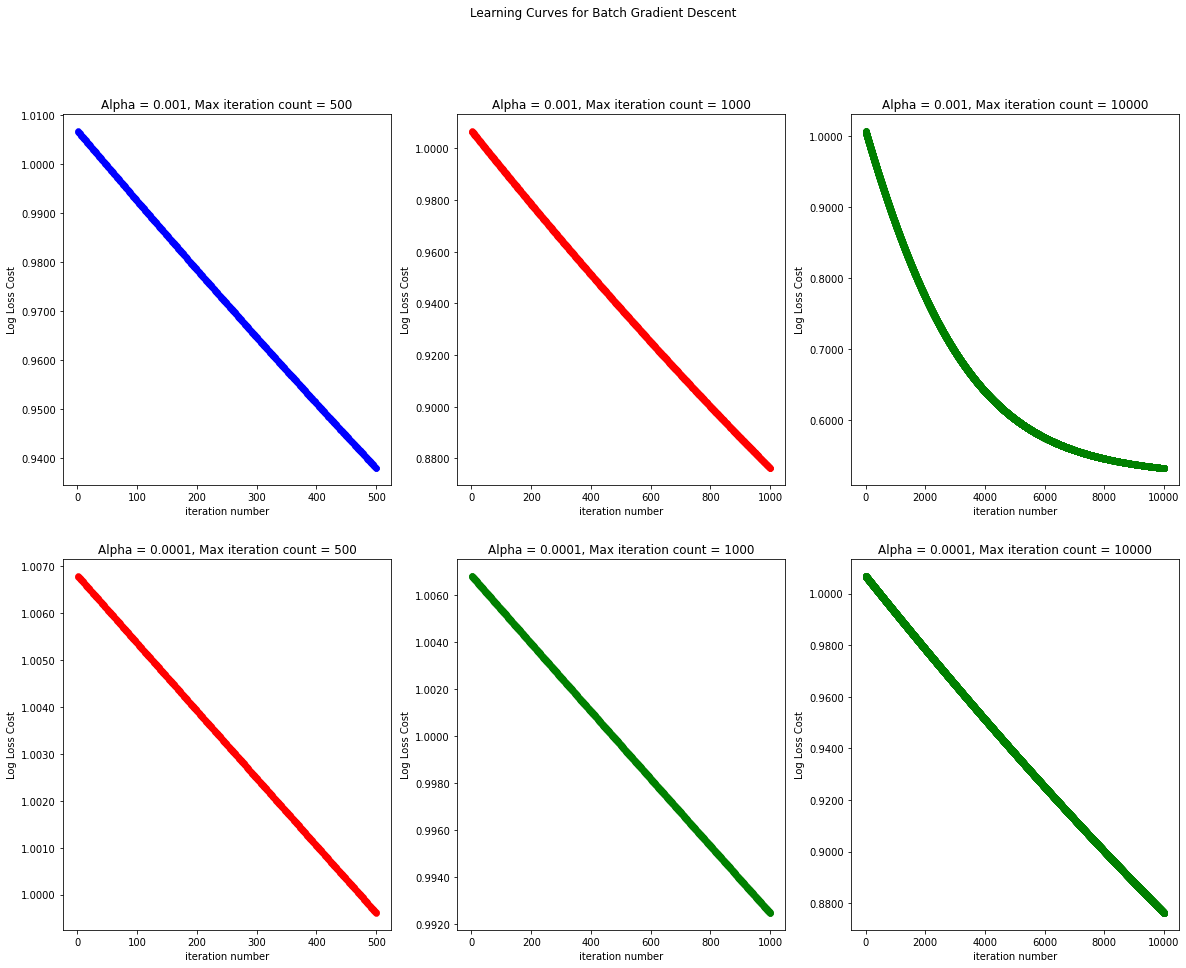

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20, 15))

ax[0][0].scatter(np.arange(1, 501, 1), cost_arr_1, color='blue', linewidth=.5)
ax[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[0][0].set_title("Alpha = 0.001, Max iteration count = 500")

ax[0][1].scatter(np.arange(1, 1001, 1), cost_arr_2, color='red', linewidth=.5)
ax[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[0][1].set_title("Alpha = 0.001, Max iteration count = 1000")

ax[0][2].scatter(np.arange(1, 10001, 1), cost_arr_3, color='green', linewidth=.5)
ax[0][2].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[0][2].set_title("Alpha = 0.001, Max iteration count = 10000")

ax[1][0].scatter(np.arange(1, 501, 1), cost_arr_4, color='red', linewidth=.5)
ax[1][0].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[1][0].set_title("Alpha = 0.0001, Max iteration count = 500")

ax[1][1].scatter(np.arange(1, 1001, 1), cost_arr_5, color='green', linewidth=.5)
ax[1][1].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[1][1].set_title("Alpha = 0.0001, Max iteration count = 1000")

ax[1][2].scatter(np.arange(1, 10001, 1), cost_arr_6, color='green', linewidth=.5)
ax[1][2].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[1][2].set_title("Alpha = 0.0001, Max iteration count = 10000")

for x in ax.flat:
    x.set(xlabel='iteration number', ylabel='Log Loss Cost')
plt.suptitle("Learning Curves for Batch Gradient Descent")

From above, we see that when learning rate 0.001, log loss cost values start to plateu at around 10,000th iteration.

So with a learning rate of 0.001, going beyond 13,000 epoch is not likely to reduce the log loss cost significantly. So optimal epoch count is likely to be 13000.

For learning rate of 0.0001, having 10000 epochs is not enough as the log loss value keeps dropping almost linearlt w.r.t iteration number.

Thus when learning rate is 0.0001, we need more than 10000 iteration, possibly around 18000

<a name="mini-batch_gradient_descent_iteration"></a>
# Mini-Bath Gradient Descent Iterations

Lets define a function that will create a list of mini-batches

In [ ]:
# Here is the function that will create a list of mini batches
def make_mini_batches(feat_matrix, target_vector, batch_size):
  # Return an array of tuples where each tuple consists of the batch feature matrix, and corresponding target vector
  num_of_full_sized_batches = feat_matrix.shape[0]//batch_size
  remaining_sample_size = feat_matrix.shape[0]%batch_size


  # Horizontal stacking
  whole_data = np.hstack((feat_matrix, target_vector))
  np.random.shuffle(whole_data)
  batched_data = []
  i = 0
  if (num_of_full_sized_batches > 0):
    while (i < num_of_full_sized_batches):
      my_tup = (whole_data[i*batch_size:(i*batch_size)+batch_size, :-1], whole_data[i*batch_size:(i*batch_size)+batch_size, -1:])
      batched_data.append(my_tup)
      i+=1
  if (remaining_sample_size > 0):
    my_tup = (whole_data[i*batch_size : , :-1 ], whole_data[i*batch_size : , -1:])
    batched_data.append(my_tup)
  return batched_data

In [ ]:
mini_batches = make_mini_batches(data_feat_matrix, data_target_vector, batch_size=50)

<a name="learning_curves_for_mini-batch_gradient_descent"></a>
#Learning Curves for Mini-Batch Gradient Descent

The function below will give us an array with cost for each iteration

In [ ]:
def list_the_costs_mini_batch(init_theta_arr, feat_matrix, target_vector, alpha, epoch_count, batch_size):

  cost_arr = np.zeros((epoch_count))
  temp_theta_arr = init_theta_arr

  for i in range(0, epoch_count):
    mini_batches = make_mini_batches(feat_matrix=feat_matrix, target_vector=target_vector, batch_size = batch_size)

    for mini_batch in mini_batches:
      temp_theta_arr = update_thetas(old_theta_arr = temp_theta_arr, feat_matrix= mini_batch[0], target_vector = mini_batch[1], alpha = alpha)
    cost_arr[i] =   calculate_cost(temp_theta_arr, feat_matrix, target_vector)
  return cost_arr, temp_theta_arr


In [ ]:
# Now lets get the cost array when alpha = 0.001, and epoch count = 500
cost_arr_1_mini_batch, theta_arr_1_mini_batch = list_the_costs_mini_batch(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.001, epoch_count=500, batch_size=50)
# Now lets get the cost array when alpha = 0.001, and epoch count = 1000
cost_arr_2_mini_batch, theta_arr_2_mini_batch = list_the_costs_mini_batch(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.001, epoch_count=1000, batch_size=50)
# Now lets get the cost array when alpha = 0.001, and epoch count = 10000
cost_arr_3_mini_batch, theta_arr_3_mini_batch = list_the_costs_mini_batch(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.001, epoch_count=10000, batch_size=50)
# Now lets get the cost array when alpha = 0.0001, and epoch count = 500
cost_arr_4_mini_batch, theta_arr_4_mini_batch = list_the_costs_mini_batch(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.0001, epoch_count=500, batch_size=50)
# Now lets get the cost array when alpha = 0.0001, and epoch count = 1000
cost_arr_5_mini_batch, theta_arr_5_mini_batch = list_the_costs_mini_batch(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.0001, epoch_count=1000, batch_size=50)
# Now lets get the cost array when alpha = 0.0001, and epoch count = 10000
cost_arr_6_mini_batch, theta_arr_6_mini_batch = list_the_costs_mini_batch(theta_init_arr, data_feat_matrix, data_target_vector, alpha = 0.0001, epoch_count=10000, batch_size=50)

Text(0.5, 0.98, 'Learning Curves for Mini-Batch Gradient Descent')

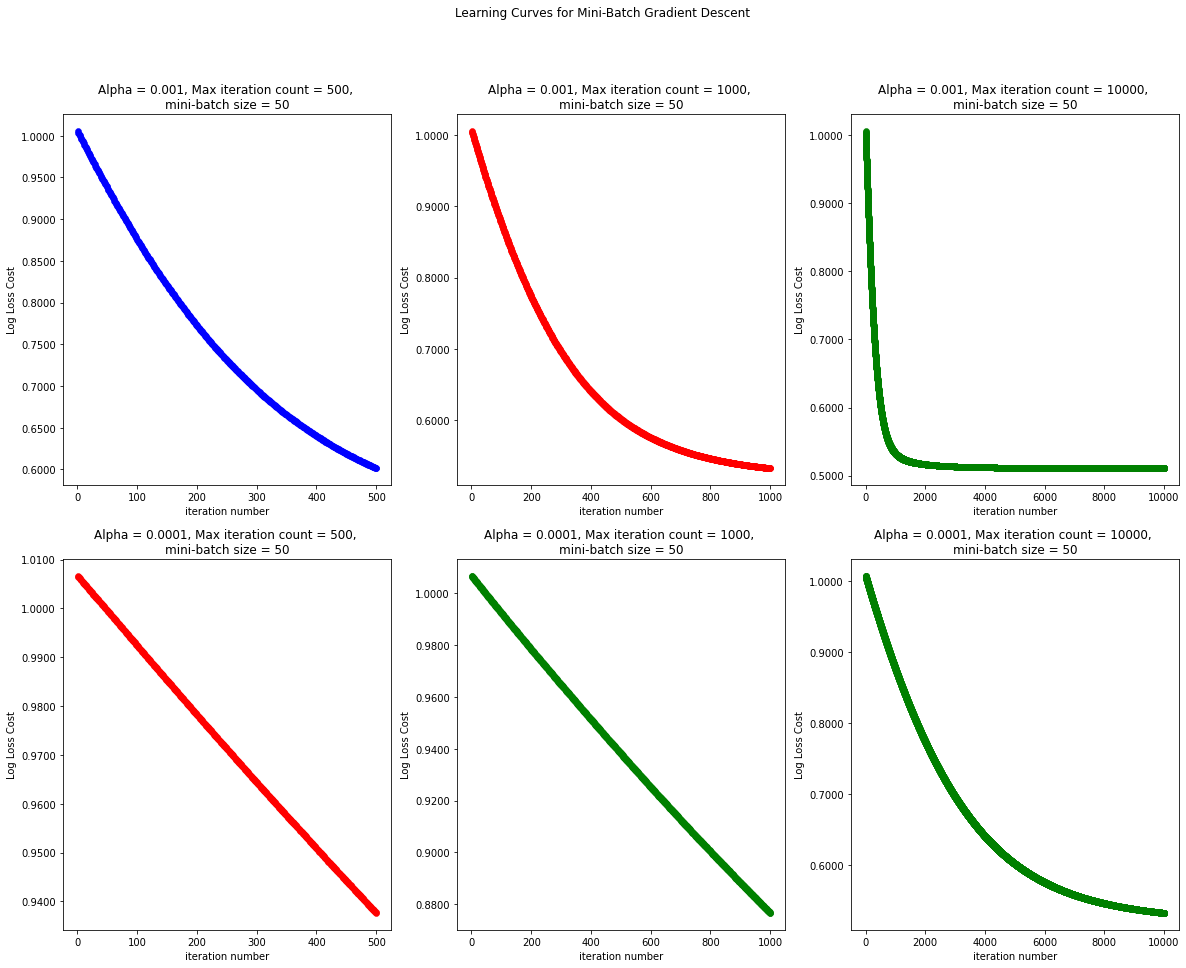

In [ ]:
# Let's plot the costs for mini-batch gradient descent
fig, ax = plt.subplots(2,3, figsize=(20, 15))

ax[0][0].scatter(np.arange(1, 501, 1), cost_arr_1_mini_batch, color='blue', linewidth=.5)
ax[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[0][0].set_title("Alpha = 0.001, Max iteration count = 500, \nmini-batch size = 50")

ax[0][1].scatter(np.arange(1, 1001, 1), cost_arr_2_mini_batch, color='red', linewidth=.5)
ax[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[0][1].set_title("Alpha = 0.001, Max iteration count = 1000, \nmini-batch size = 50")

ax[0][2].scatter(np.arange(1, 10001, 1), cost_arr_3_mini_batch, color='green', linewidth=.5)
ax[0][2].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[0][2].set_title("Alpha = 0.001, Max iteration count = 10000, \nmini-batch size = 50")

ax[1][0].scatter(np.arange(1, 501, 1), cost_arr_4_mini_batch, color='red', linewidth=.5)
ax[1][0].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[1][0].set_title("Alpha = 0.0001, Max iteration count = 500, \nmini-batch size = 50")

ax[1][1].scatter(np.arange(1, 1001, 1), cost_arr_5_mini_batch, color='green', linewidth=.5)
ax[1][1].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[1][1].set_title("Alpha = 0.0001, Max iteration count = 1000, \nmini-batch size = 50")

ax[1][2].scatter(np.arange(1, 10001, 1), cost_arr_6_mini_batch, color='green', linewidth=.5)
ax[1][2].yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax[1][2].set_title("Alpha = 0.0001, Max iteration count = 10000, \nmini-batch size = 50")

for x in ax.flat:
    x.set(xlabel='iteration number', ylabel='Log Loss Cost')
plt.suptitle("Learning Curves for Mini-Batch Gradient Descent")

From the figure above, we see that when learning rate is 0.001, epoch count of about 6000 is enogh to train the model.

When the learning rate is 0.0001, having an epoch count of around 13000 is likely to be enough for the model to be fully trained.

<a name="comparison_with_sci_kit_learn"></a>
# Compariswon with Sci-Kit Learn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(penalty = 'none',random_state=17, max_iter=10000)

In [ ]:
# fit the model with data
logreg.fit(data_feat_matrix, data_target_vector.reshape((data_target_vector.shape[0])))

LogisticRegression(max_iter=10000, penalty='none', random_state=17)

In [ ]:
# Get the coefficients
coef = logreg.coef_[0]

In [ ]:
coef

array([-0.63156103,  0.13315732,  0.36418342,  0.35978661,  0.14445977,
        0.38830045, -0.26478657,  0.00297737,  0.65997958,  0.92538157])

Now let's compare these values with the mini-batch case when alpha = 0.001, with epoch count of 10,000.

In [ ]:
theta_arr_3_mini_batch

array([-1.24516288,  0.13214501,  0.3646845 ,  0.3630777 ,  0.11146452,
        0.38851153, -0.23951944,  0.00422043,  0.6770253 ,  0.89737128])

Close examination of the coefficients we calculated and the co-efficents generated by Sci-kit learn reveals that all the coefficients are indeed very close.

However, a notieable discrepancy between the bias coefficients is observed. This can be explained by the random nature of the coefficients' initializations. Anothe factor is that Sci-kit learn uses more efficient algorithms (solvers) which can give slightly more accurate results compared to our binary cross-entropy based model. This factor may have also caused the difference between the bias coefficients.

Thus, we conclude our implemented logistic regression model closely resembles
the Sci-kit learn module's logistic regression.